#  Hierarchical Clustering Project: Gene Sample Clustering

Hierarchical Clustering, a powerful unsupervised learning technique often used in customer segmentation, gene expression analysis, and document clustering.

## 🎯 Problem Statement:
- Cluster gene samples based on their expression levels across different biomarkers. This helps in identifying groups of similar genes (e.g., healthy vs diseased samples).

- Unlike K-Means, Hierarchical Clustering builds a tree (dendrogram) and doesn't need us to pre-specify the number of clusters.

**Simulated Dataset Features**


| Feature       | Description                |
| ------------- | -------------------------- |
| `gene_1_expr` | Expression level of gene 1 |
| `gene_2_expr` | Expression level of gene 2 |
| `gene_3_expr` | Expression level of gene 3 |
| `gene_4_expr` | Expression level of gene 4 |
| `gene_5_expr` | Expression level of gene 5 |



In [7]:
# Simulate Dataset

import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.DataFrame({
    'gene_1_expr': np.random.normal(5, 2, 20),
    'gene_2_expr': np.random.normal(10, 2.5, 20),
    'gene_3_expr': np.random.normal(7, 1.5, 20),
    'gene_4_expr': np.random.normal(3, 1, 20),
    'gene_5_expr': np.random.normal(12, 3, 20)
})

data.head()


,gene_1_expr,gene_2_expr,gene_3_expr,gene_4_expr,gene_5_expr
0,5.993428,13.664122,8.107700,2.520826,11.340984
1,4.723471,9.435559,7.257052,2.814341,13.071338
2,6.295377,10.168821,6.826528,1.893665,16.433682
3,8.046060,6.438130,6.548344,1.803793,10.445189
4,4.531693,8.639043,4.782217,3.812526,9.574519


In [8]:
# Scaling the Data
# Hierarchical clustering uses distance — scale features first.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)





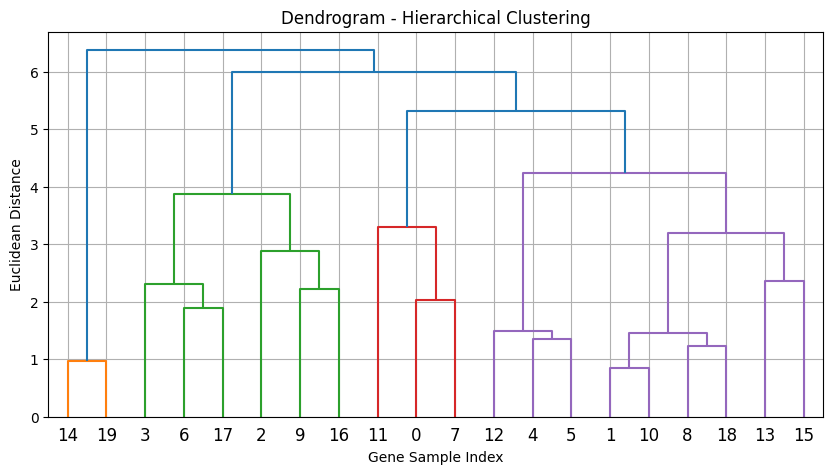

In [9]:
# Build Dendrogram
# This helps visualize how clusters are formed step-by-step.

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Gene Sample Index")
plt.ylabel("Euclidean Distance")
plt.grid()
plt.show()

# Interpretation:
# Cut the dendrogram at a height where branches split — this gives the number of clusters.


In [10]:
# Fit Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Based on dendrogram, we choose 3 clusters
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['cluster'] = hc.fit_predict(scaled_data)

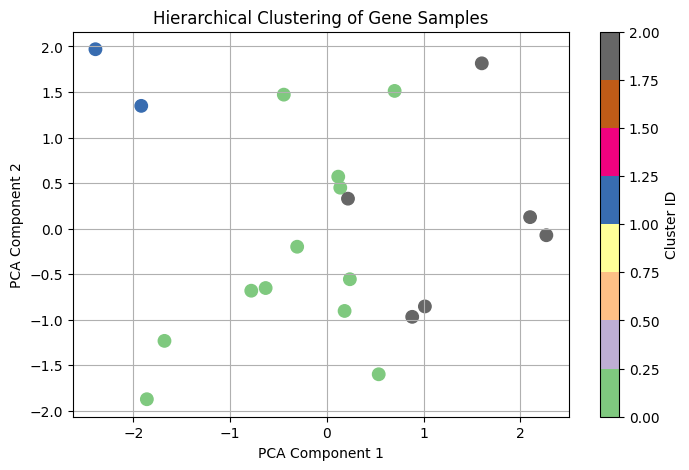

In [11]:
# Visualize Clusters (2D using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
plt.scatter(reduced[:, 0], reduced[:, 1], c=data['cluster'], cmap='Accent', s=80)
plt.title("Hierarchical Clustering of Gene Samples")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.colorbar(label="Cluster ID")
plt.show()



In [12]:
# Interpret Clusters
print(data.groupby("cluster").mean())


         gene_1_expr  gene_2_expr  gene_3_expr  gene_4_expr  gene_5_expr
cluster                                                                 
0           4.352890     9.627459     7.156064     3.600918    11.300947
1           1.862778    11.274258     8.504908     0.696343    11.059957
2           6.197969     8.103869     6.052785     2.461395    13.472734


| Cluster | Description                          |
| ------- | ------------------------------------ |
| 0       | High expression of gene\_2 & gene\_5 |
| 1       | Low expression of gene\_3 & gene\_4  |
| 2       | Moderate expression across all genes |

| Strength                               | Why It Matters                                 |
| -------------------------------------- | ---------------------------------------------- |
| 🌲 Dendrogram-based                    | Helps visualize how clusters are formed        |
| 🧠 No need to pre-define k             | Auto-discovers natural groupings               |
| ⚖️ Works well on small/medium datasets | Especially when k-means fails                  |
| 🔀 Flexible linkage methods            | Choose between single, complete, average, ward |


| Limitation                        | Why It Matters                  |
| --------------------------------- | ------------------------------- |
| 🐢 Slow on large data             | Time complexity = O(n²)         |
| ❌ Not scalable                    | Not practical for >10k samples  |
| 🔀 Hard to determine best linkage | Needs experimentation           |
| ❌ No cluster "centroid"           | Not great for outlier detection |


Real-World Use Cases
🧬 Gene expression or DNA sequence clustering

🛒 Customer segmentation in small businesses

🧾 Document topic clustering (after vectorizing text)

🧠 Brain imaging data grouping

| Step                 | Action                                            |
| -------------------- | ------------------------------------------------- |
| Data                 | 20 gene samples × 5 expression levels             |
| Clustering Algorithm | Agglomerative (Ward linkage, Euclidean distance)  |
| Visualization        | Dendrogram + PCA                                  |
| Clusters Formed      | 3 (based on dendrogram cut)                       |
| Insight              | Grouped similar gene behavior without supervision |
